# Linear Regression

Linear regression is a supervised learning algorithm that models the relationship between variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that can be used to predict outcomes for new data points.

The relationship between the independent variable(s) and the dependent variable can be expressed mathematically as:

y = mx + b

In this equation:

y represents the dependent variable (the value we want to predict).
x denotes the independent variable (the feature used for prediction).
m is the slope of the line, which indicates the change in y for a one-unit change in x.
b is the y-intercept, which represents the value of y when x is zero.

In the case of multiple linear regression, where there are numerous independent variables, the equation expands to:

y=b0+b1x1+b2x2+…+bnxn

Where:

b0 is the intercept.
b1,b2,…,bn​ are the coefficients corresponding to each independent variable x1,x2,…,xn​.


# Best line fit

The line of best fit, or regression line, is the core of linear regression. It represents the predicted relationship between the independent variable(s) and the dependent variable. Linear regression aims to find the line that minimises the discrepancies between the predicted and observed values in the dataset.

To visualise this, consider a scatter plot of data points, where each point represents an observation with its corresponding independent and dependent variable values. The regression line is fitted through the data points to minimise the vertical distances (errors) between the points and the line itself. The following formula for the distance of each point from the line can mathematically represent this:

Error=y−y^​

where y is the actual value, and y^​ is the predicted value from the regression line.

# Step-by-Step Implementation

- Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis.

## Assumptions



- 6 Assumptions of linear regression include:

1. **Linearity**: The relationship between the dependent and independent variables is linear.

  - There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
  - **Scatter plot/ Pair plot** between the independent and dependent variables


2. **Independence of Errors**: The observations are independent of each other.
  - There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation
  - **Plotting the residuals/ errors, against the independent variables** allows you to evaluate this.
  - The residuals (errors) should be independent. This means that the error associated with one observation does not depend on the errors of others.


3. **Homoscedasticity**: The variance of the errors is constant across all levels of the independent variables.
  - The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity
  - For every level of the independent variables, the variance of the errors should remain constant. In other words, the distribution of residuals should be consistent across the entire range of the independent variables
  - **residual vs. fitted plot** - The red line, representing the fitted values, should ideally have a horizontal line centered around zero

4. **Normality of Errors**: The errors follow a normal distribution.
  - The error terms must be normally distributed
  -**Q-Q plots of the residuals or histograms. statistical tests such as the Kolmogorov-Smirnov test can be used to check the normality assumption.**
  - While not strictly necessary for prediction, normally distributed errors are essential for conducting hypothesis tests on the coefficients.

  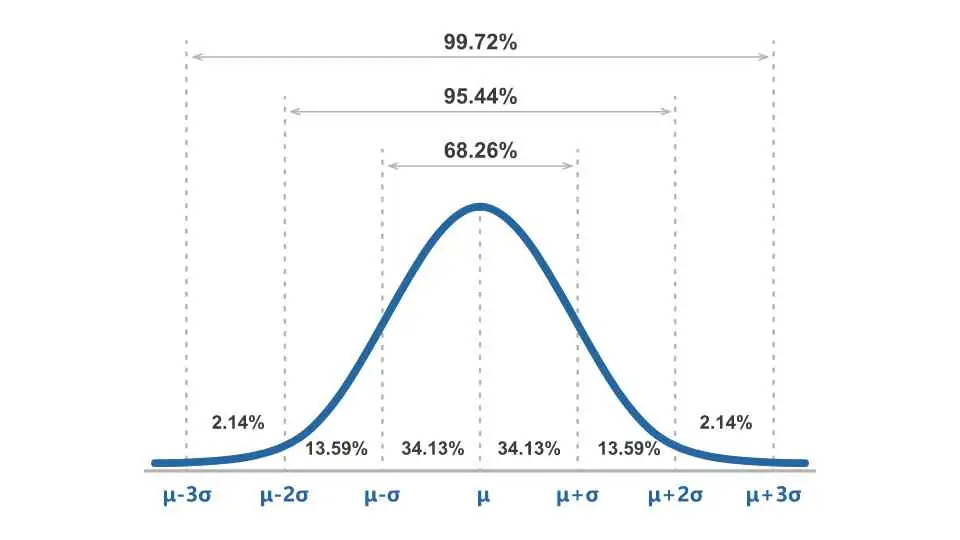


5. **No multicollinearity**: The independent variables are not highly correlated with each other.
  - The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
  - **Correlation matrices **(preferably with correlation coefficients less than 0.8) or the **Variance Inflation Factor (VIF) **can be used to test for this. Values greater than or equal to 10 indicate significant multicollinearity.
  - High multicollinearity can lead to instability in coefficient estimates


6. **No endogeneity**: There is no relationship between the errors and the independent variables.



**What Happens When You Violate the Assumptions of Linear Regression?**

1. **Linear and Additive**
If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

  - **How to check**: Look for ***residual vs fitted value plots***, also include ***polynomial terms (X, X², X³)*** in your model to capture the non-linear effect.

2. **Autocorrelation**
The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.
If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.

Let’s understand narrow prediction intervals with an example:

For example, the least square coefficient of X¹ is 15.02 and its standard error is 2.08 (without autocorrelation). But in presence of autocorrelation, the standard error reduces to 1.20. As a result, the prediction interval narrows down to (13.82, 16.22) from (12.94, 17.10).

Also, lower standard errors would cause the associated p-values to be lower than actual. This will make us incorrectly conclude a parameter to be statistically significant.

  - **How to check:** Look for ***Durbin – Watson (DW) statistic***. It must lie **between 0 and 4**. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see **residual vs time plot and look for the seasonal or correlated pattern in residual values.**

3. **Multicollinearity**
It occurs when the independent variables show moderate to high correlation. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.

Additionally, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on the presence of other predictors in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!

  - How to check: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.



4. **Heteroskedasticity**
The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in **presence of outliers or extreme leverage values**. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

  - **How to check:** You can look at **residual vs fitted values **plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern. Also, you can use **Breusch-Pagan / Cook – Weisberg test or White general test** to detect this phenomenon.

5. **Normal Distribution of error terms**
If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.

  - **How to check:** You can look at **QQ plot**. You can also perform statistical tests of normality such as **Kolmogorov-Smirnov test, Shapiro-Wilk test.**



**Interpretation of Regression Plots**


1. Residual vs Fitted Values: There are two major things which you should learn:

  - If there exist any pattern (may be, a parabolic shape) in this plot, consider it as signs of non-linearity in the data. It means that the model doesn’t capture non-linear effects.
  - If a funnel shape is evident in the plot, consider it as the signs of non constant variance i.e. heteroskedasticity.
  - **Solution**: To overcome the issue of non-linearity, you can do a **non linear transformation of predictors** such as log (X), √X or X² transform the dependent variable. To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can **use weighted least square method to tackle heteroskedasticity.**

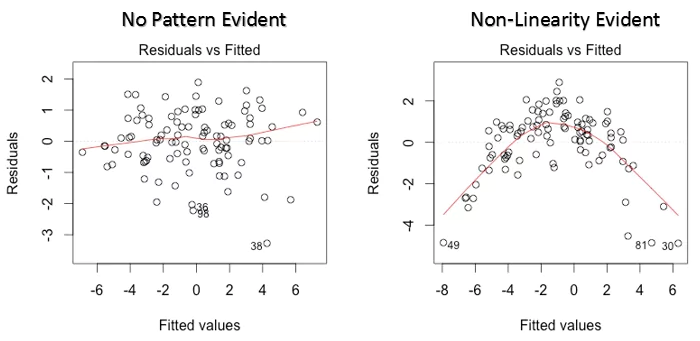

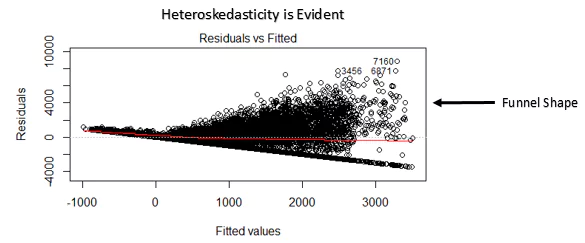

2. **Normal Q-Q Plot** - To validate the assumption of normal distribution in a data set. Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. Think of quantiles as points in your data below which a certain proportion of data falls. Quantile is often referred to as percentiles. For example: when we say the value of 50th percentile is 120, it means half of the data lies below 120.

  - **Solution**: If the errors are not normally distributed, non – linear transformation of the variables (response or predictors) can bring improvement in the model.


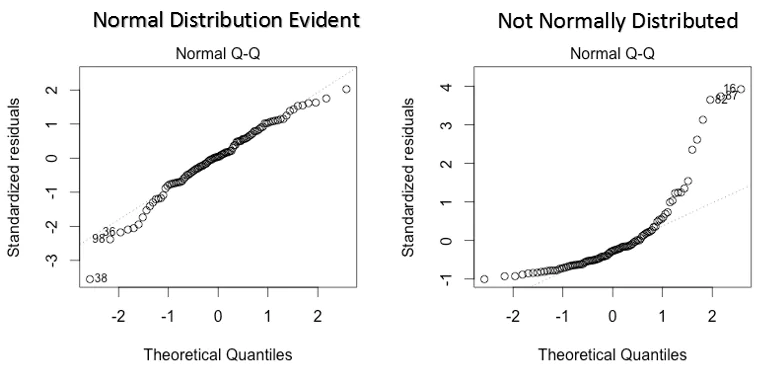

3. **Scale Location Plot** - To detect homoskedasticity (assumption of equal variance). It shows how the residual are spread along the range of predictors. It’s similar to residual vs fitted value plot except it uses standardized residual values. Ideally, there should be no discernible pattern in the plot. This would imply that errors are normally distributed. But, in case, if the plot shows any discernible pattern (probably a funnel shape), it would imply non-normal distribution of errors.

   - **Solution**: To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable. To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity

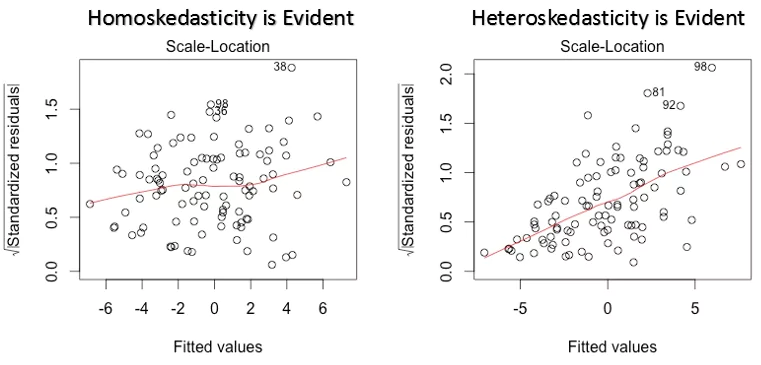

4. **Residuals vs Leverage Plot**: Cook’s distance attempts to identify the points which have more influence than other points. Such influential points tends to have a sizable impact of the regression line. In other words, adding or removing such points from the model can completely change the model statistics.

But, can these influential observations be treated as outliers? Only data can answer this question.. Therefore, in this plot, the large values marked by cook’s distance might require further investigation.

  - **Solution**: For influential observations which are nothing but outliers, if not many, you can remove those rows. Alternatively, you can scale down the outlier observation with maximum value in data or else treat those values as missing values.


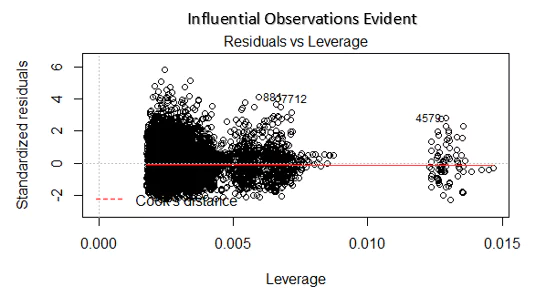

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

## 1. Data Preprocessing Steps


1. **Load and examine the data**:
   - Check the basic structure (shape, head, data types)
   - Identify missing values
   - Generate summary statistics

2. **Handle missing values**:
   - For numerical features: Replace with mean/median
   - For categorical features: Replace with mode

3. **Handle categorical variables/ Encoding**:
   - One-hot encoding for categorical features
   - Consider ordinal encoding for ordered categories

4. **Detect and handle outliers**: - to aviod Hetrosedasticity
   - Use boxplots and IQR method to identify outliers
   - Decide whether to remove, transform, or keep them

5. **Feature scaling**: <Only on Independent Features, not on Dependent Feature>
   - Standardize features (mean=0, std=1, **unknown** range) or normalization (scaling values to a range like 0 to 1, **known** range).
   - Critical for linear regression to avoid dominance of variables with larger scales
   **Note:** Split the data into X, y before scaling the data

**How to Address Multicollinearity:**

- Variance Inflation Factor (VIF): Calculate VIF to identify highly correlated variables.

- Remove correlated features: Drop one or more of the highly correlated variables.

- Combine correlated features: Create new features by combining existing ones.

- Regularization: Use Ridge or Lasso regression, which can help stabilize coefficient estimates

In [ ]:
# Step 1: Load and examine the data
def load_and_examine_data(data_path):
    """
    Load the dataset and perform initial examination
    """
    # Load data
    df = pd.read_csv(data_path)

    # Basic examination
    print("Data shape:", df.shape)
    print("\nFirst 5 rows:")
    print(df.head())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Summary statistics
    print("\nSummary statistics:")
    print(df.describe())

    return df

## 2. Linear Regression Assumptions Check

1. **Linearity**: The relationship between X and Y must be linear
   - Visual check: **Scatter plots** between each feature and target
   - Residual plots: Should show random pattern around zero line

2. **Independence**: Observations must be independent - No Auto-correlation
   - **Durbin-Watson test** for time series data. Durbin-Watson value is very close to 2 (No Autocorrelation)
   - Plot residuals against observation order
   - Sample Code
   
   if durbin_watson < 1.5:
        print("   ⚠ Potential positive autocorrelation detected (DW < 1.5)")
    elif durbin_watson > 2.5:
        print("   ⚠ Potential negative autocorrelation detected (DW > 2.5)")
    else:
        print("   ✓ No significant autocorrelation detected (DW ~ 2)")

3. **Homoscedasticity**: Variance of residuals should be constant
   - Plot residuals vs predicted values
   - **Breusch-Pagan test or White test**
   - **If violated: **Consider weighted least squares or transformations

4. **Normality of Residuals**: Residuals should be normally distributed
   - Visual: **Q-Q plot** and histogram of residuals
   - Statistical: **Shapiro-Wilk test or Kolmogorov-Smirnov test**
   - **If violated:** Consider transforming the target variable

5. **No multicollinearity**: Predictors should not be highly correlated
   - Correlation matrix/ Heat Map
   - **Variance Inflation Factor** (VIF > 10 indicates problematic multicollinearity)
   - Solution: Remove correlated features or use regularization

In [ ]:
# Step 2: Data preprocessing
def preprocess_data(df, target_column, categorical_columns=None):
    """
    Preprocess data by handling missing values, encoding categorical variables, etc.
    """
    # Create a copy to avoid modifying the original dataframe
    processed_df = df.copy()

    # Handling missing values
    # For numerical columns, fill with mean
    num_cols = processed_df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if processed_df[col].isnull().sum() > 0:
            processed_df[col].fillna(processed_df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    if categorical_columns:
        for col in categorical_columns:
            if processed_df[col].isnull().sum() > 0:
                processed_df[col].fillna(processed_df[col].mode()[0], inplace=True)

        # One-hot encode categorical variables
        processed_df = pd.get_dummies(processed_df, columns=categorical_columns, drop_first=True)

    # Separate features and target
    X = processed_df.drop(target_column, axis=1)
    y = processed_df[target_column]

    return X, y

In [ ]:
# Step 3: Check for normality of the target variable
def check_normality(y):
    """
    Check if the target variable follows a normal distribution
    """
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(y, kde=True)
    plt.title('Histogram of Target Variable')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(y, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Target Variable')

    plt.tight_layout()
    plt.show()

    # Statistical test for normality
    stat, p_value = stats.shapiro(y)
    print(f"Shapiro-Wilk Test: Statistics={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("Target variable appears to be normally distributed (fail to reject H0)")
    else:
        print("Target variable does not appear to be normally distributed (reject H0)")
        print("Consider transforming the target variable (e.g., log transformation)")

In [ ]:
# Step 4: Check for outliers
def check_outliers(X, y):
    """
    Check for outliers in the dataset
    """
    # Combine features and target for easier analysis
    df_combined = pd.concat([X, pd.Series(y, name='target')], axis=1)

    # Boxplot for target variable
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_combined['target'])
    plt.title('Boxplot of Target Variable')
    plt.show()

    # Boxplots for numerical features
    num_cols = X.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(num_cols)

    if n_cols > 0:
        n_rows = (n_cols + 1) // 2
        plt.figure(figsize=(15, n_rows * 4))

        for i, col in enumerate(num_cols):
            plt.subplot(n_rows, 2, i + 1)
            sns.boxplot(y=X[col])
            plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

    return df_combined

In [ ]:
# Step 5: Check for multicollinearity
def check_multicollinearity(X):
    """
    Check for multicollinearity among features using VIF
    """
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print("Variance Inflation Factors:")
    print(vif_data.sort_values("VIF", ascending=False))
    print("\nVIF < 5 is good. Potential multicollinearity detected ({high_vif-1} variables with VIF > 5")
    print("\nVIF > 10 indicates problematic multicollinearity")

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # between (+ or -) 0.2 to 0.6 - Week correlation
    # between (+ or -) 0.6 to 1 - strong correlation
    #between -0.2 and +0.2 - No significant correlation

    # If the value is more than 0.8, there is multi-collinearity

    # VIF = 1/(1-0.8)=10/2=5

    return vif_data

## 3. Feature Scaling

In [ ]:
# Step 6: Split data into train and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test

In [ ]:
# Step 7: Feature scaling
def scale_features(X_train, X_test):
    """
    Scale features using StandardScaler
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to pandas DataFrame for better handling
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    return X_train_scaled, X_test_scaled, scaler

## 4. Feature Significance Check

1. **Statistical significance**:
   - Use t-tests for individual coefficients (p-values)
   - Features with p < 0.05 are generally considered significant

2. **F-statistic**:
   - Tests overall model significance
   - High F-statistic with low p-value indicates a significant model

3. **Feature importance**:
   - Examine standardized coefficients
   - Feature selection methods: recursive feature elimination, forward/backward selection

In [ ]:
# Step 8: Feature significance check (using statsmodels)
def check_feature_significance(X_train, y_train):
    """
    Check feature significance using statsmodels
    """
    # Add constant for statsmodels (intercept)
    X_train_sm = sm.add_constant(X_train)

    # X-train should not be scaled

    # Reset index to ensure alignment
    # This is the crucial change to align indices
    y_train = y_train.reset_index(drop=True)
    X_train_sm = X_train_sm.reset_index(drop=True)

    # Fit model
    model = sm.OLS(y_train, X_train_sm).fit()

    """
    from statsmodels.regression.linear_model import OLS
    import statsmodels.regression.linear_model as smf
    reg_model = smf.OLS(endog = y_train, exog = x_train).fit()
    reg_model.summary()

    Returns below details
    1. pvalue
    2. Durbin waston Autocorrelation value
    3. Adjusted R square -- Accuracy"
    """

    # Summary
    print(model.summary())

    # Extract p-values
    p_values = model.pvalues[1:]  # Skip the constant
    significant_features = p_values[p_values < 0.05].index.tolist()

    print("\nStatistically significant features (p < 0.05):")
    print(significant_features)

    return model, significant_features

## 5. Model Training and Evaluation



1. **Train the model**:
   - Split data into training and testing sets
   - Fit the model on training data
   - Examine coefficients and intercept

2. **Evaluate the model**:
   - R² (coefficient of determination): Proportion of variance explained. statistical measure that indicates how well the independent variables explain the variability of the dependent variable. An R² value of 1 indicates perfect prediction, while a value of 0 suggests no predictive power.
   - Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values.
   - MSE - Mean Squared Error (MSE): Average of the squared differences between predicted and actual values.
   - RMSE: Error metrics
   - Adjusted R²: Accounts for model complexity
   - Cross-validation for robust performance estimation

### Loss Function

- to quantify how well the line fits the data. The most commonly used loss function for linear regression is the **Mean Squared Error (MSE)**, which measures the average of the squares of the errors:

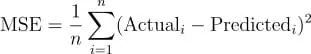

where:

n is the number of observations,
Actual_i​ is the actual value,
Predicted_​i​ is the predicted value for the ith observation.

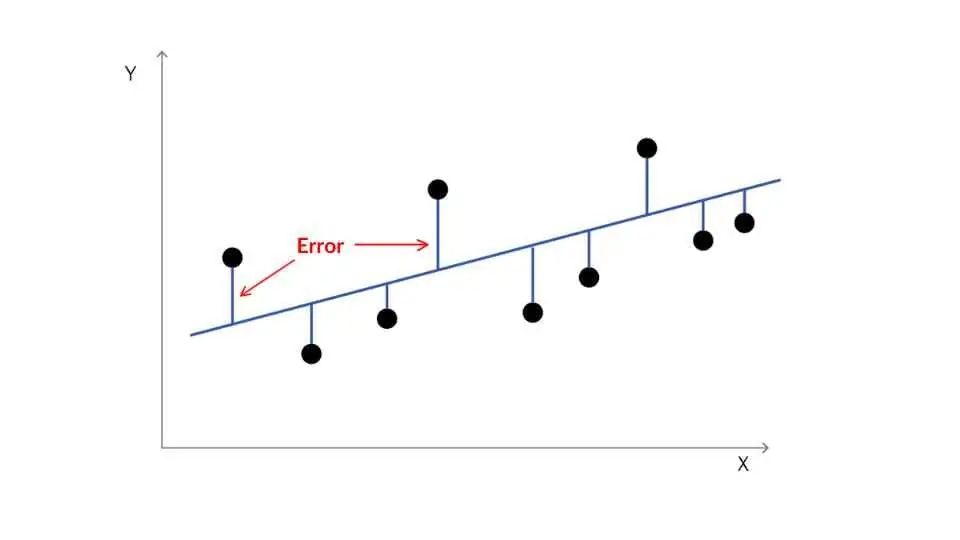


### Gradient Descent

Once we define the loss function, the next step is to optimise the model parameters. This is where gradient descent comes into play. Gradient descent is an iterative optimisation algorithm that minimises the loss function by updating the parameters (slope and intercept) in the direction that reduces the error.

The update rule for gradient descent can be expressed as follows

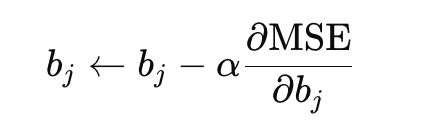

where:

bj​ represents the coefficients (slope or intercept),
α is the learning rate, a hyperparameter that determines the size of the steps taken towards the minimum.


In [ ]:

# Step 9: Train the linear regression model
def train_linear_regression(X_train, y_train):
    """
    Train a linear regression model using sklearn
    """
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Model coefficients:")
    coef_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_
    })
    print(coef_df.sort_values('Coefficient', ascending=False))
    print(f"Intercept: {model.intercept_:.4f}")

    return model

In [ ]:
# Step 10: Evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the model on training and testing sets
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Testing metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    print("Training Set Metrics:")
    print(f"R² score: {train_r2:.4f}")
    print(f"MSE: {train_mse:.4f}")
    print(f"RMSE: {train_rmse:.4f}")

    print("\nTesting Set Metrics:")
    print(f"R² score: {test_r2:.4f}")
    print(f"MSE: {test_mse:.4f}")
    print(f"RMSE: {test_rmse:.4f}")

    return {
        'train_r2': train_r2,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'test_r2': test_r2,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }


## 6. Assumption validation based on Residuals

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [ ]:
# Step 11: Check linear regression assumptions
def check_assumptions(X_train, y_train, y_train_pred, y_test, y_test_pred):
    """
    Check the linear regression assumptions
    """
    # Residuals
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # 1. Linearity check
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_pred, train_residuals)
    plt.axhline(y=0, color='r', linestyle='-') #check
    plt.title('Residuals vs Fitted Values (Training Set)')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Add LOWESS smoothed line to help identify non-linearity
    lowess = sm.nonparametric.lowess(residuals, fitted_values, frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], color='blue', linestyle='-', lw=2)
    plt.show()

    # Component + Residual plots (partial regression plots)
    feature_no_const = [f for f in feature_cols if f != 'const']
    fig = plt.figure(figsize=(15, 10))
    fig = sm.graphics.plot_ccpr_grid(model, fig=fig)
    plt.tight_layout()
    plt.show()

    # Added Variable Plots (to detect non-linearity after accounting for other predictors)
    fig = plt.figure(figsize=(15, 10))
    fig = sm.graphics.plot_regress_exog(model, feature_no_const, fig=fig)
    plt.tight_layout()
    plt.show()

    # **Component + Residual plots** (partial regression plots) to identify non-linear relationships for each predictor while controlling for other variables
    # **Added Variable Plots** to detect the specific effect of each predictor after accounting for others
    # LOWESS smoothed lines on residual plots to better identify non-linear patterns

    print("   ✓ Visual inspection required: Residuals should be randomly scattered around zero line")
    print("   ✓ Visual inspection required: Component+Residual plots should show linear patterns")

    # 2. Check for independence of errors (Durbin-Watson test)
    print("\n2. INDEPENDENCE OF ERRORS")
    durbin_watson = sm.stats.stattools.durbin_watson(train_residuals)
    results['durbin_watson'] = durbin_watson
    print(f"   Durbin-Watson statistic: {durbin_watson:.4f}")

    if durbin_watson < 1.5:
        print("   ⚠ Potential positive autocorrelation detected (DW < 1.5)")
    elif durbin_watson > 2.5:
        print("   ⚠ Potential negative autocorrelation detected (DW > 2.5)")
    else:
        print("   ✓ No significant autocorrelation detected (DW ~ 2)")

    # 2. Normality of residuals
    plt.figure(figsize=(12, 5))

    # Histogram of residuals
    plt.subplot(1, 2, 1)
    sns.histplot(train_residuals, kde=True)
    plt.title('Histogram of Residuals (Should be normally distributed)')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')

    # Q-Q plot - way 1
    plt.subplot(1, 2, 2)
    stats.probplot(train_residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

    # QQ plot way2
    plt.figure(figsize=(10, 6))
    QQ = stats.probplot(train_residuals)
    fig = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plt.title('Q-Q Plot of Residuals (Should follow diagonal line)')
    plt.show()


    # Statistical test for normality of residuals
    stat, shapiro_p_value = stats.shapiro(train_residuals)
    print(f"Shapiro-Wilk Test for Residuals: Statistics={stat:.4f}, p-value={shapiro_p_value:.4f}")
    if shapiro_p_value < 0.05:
        print("   ⚠ Residuals may not be normally distributed (p < 0.05)")
    else:
        print("   ✓ Residuals appear normally distributed (p >= 0.05)")

    # Jarque-Bera test for normality
    jb_test = stats.jarque_bera(train_residuals)
    results['jarque_bera_test'] = jb_test
    print(f"   Jarque-Bera test: JB={jb_test[0]:.4f}, p-value={jb_test[1]:.4f}")

    if jb_test[1] < 0.05:
        print("   ⚠ Residuals may not be normally distributed (p < 0.05)")
    else:
        print("   ✓ Residuals appear normally distributed (p >= 0.05)")

    # 3. Homoscedasticity (constant variance) - equal variance of residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_pred, np.abs(train_residuals))
    plt.title('Homoscedasticity Check: |Residuals| vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('|Residuals|')
    plt.show()

    # Scale-Location plot (sqrt of standardized residuals vs fitted)
    standardized_residuals = train_residuals / np.sqrt(np.mean(train_residuals**2))
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
    lowess = sm.nonparametric.lowess(np.sqrt(np.abs(standardized_residuals)), y_train_pred, frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='-', lw=2)
    plt.title('Scale-Location Plot: √|Standardized Residuals| vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('√|Standardized Residuals|')
    plt.show()

    # Statistical test for homoscedasticity
    stat, p_value = stats.levene(train_residuals[y_train_pred < np.median(y_train_pred)],
                                train_residuals[y_train_pred >= np.median(y_train_pred)])
    print(f"Levene Test for Homoscedasticity: Statistics={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("Residuals appear to have constant variance (fail to reject H0)")
    else:
        print("Residuals do not appear to have constant variance (reject H0)")


    # Breusch-Pagan test
    bp_test = het_breuschpagan(train_residuals, X)
    results['breusch_pagan_test'] = bp_test
    print(f"   Breusch-Pagan test: LM={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    if bp_test[1] < 0.05:
        print("   ⚠ Heteroscedasticity detected (p < 0.05)")
    else:
        print("   ✓ Homoscedasticity assumption likely met (p >= 0.05)")

    # White's test
    white_test = het_white(train_residuals, X)
    results['white_test'] = white_test
    print(f"   White's test: LM={white_test[0]:.4f}, p-value={white_test[1]:.4f}")

    if white_test[1] < 0.05:
        print("   ⚠ Heteroscedasticity detected (p < 0.05)")
    else:
        print("   ✓ Homoscedasticity assumption likely met (p >= 0.05)")

    # **Breusch-Pagan test** for detecting general heteroscedasticity
    # White's test** for detecting both heteroscedasticity and specification errors
    # Scale-Location plot with LOWESS smoothing to visualize changing variance

    # 4. Actual vs. Predicted plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Actual vs. Predicted Values (Testing Set)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    #Distribution plot
    plt.figure(figsize=(10, 6))
    sns.distplot((y_test, y_test_pred), bins=30)
    plt.show()

    # 5. Check for multicollinearity among features using VIF

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print("Variance Inflation Factors:")
    print(vif_data.sort_values("VIF", ascending=False))
    print("\nVIF < 5 is good. Potential multicollinearity detected ({high_vif-1} variables with VIF > 5")
    print("\nVIF > 10 indicates problematic multicollinearity")

    high_vif = vif_data[vif_data["VIF"] > 5].shape[0]
    if high_vif > 1:  # Ignore the constant term which often has high VIF
        print(f"   ⚠ Potential multicollinearity detected ({high_vif-1} variables with VIF > 5)")
    else:
        print("   ✓ No significant multicollinearity detected (VIF <= 5 for all variables)")

    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # 6. Check for influential observations / outliers
    print("\n6. INFLUENTIAL OBSERVATIONS / OUTLIERS")
    # **Cook's distance** to identify influential observations
    # DFFITS** to measure how each observation affects the fitted values
    # DFBETAS** to measure how each observation affects each coefficient estimate
    # Influence plots to visually identify high-leverage, high-influence points

    # Calculate influence statistics
    influence = model.get_influence()

    # Cook's distance
    cooks_d = influence.cooks_distance[0]
    results['cooks_distance'] = cooks_d

    # Plot Cook's distance
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
    plt.axhline(y=4/len(X), color='r', linestyle='--')
    plt.title("Cook's Distance (Potential influential points above red line)")
    plt.xlabel('Observation')
    plt.ylabel("Cook's Distance")
    plt.show()

    # Identify potential influential observations
    threshold = 4/len(X)
    influential_points = np.where(cooks_d > threshold)[0]
    results['influential_points'] = influential_points

    if len(influential_points) > 0:
        print(f"   ⚠ {len(influential_points)} potentially influential observations detected")
        print(f"   Influential observation indices: {influential_points}")
    else:
        print("   ✓ No influential observations detected")

    # Leverage plot
    plt.figure(figsize=(10, 6))
    sm.graphics.influence_plot(model, criterion="cooks", size=50)
    plt.tight_layout()
    plt.show()

    # DFFITS (difference in fits)
    dffits = influence.dffits[0]
    dffits_threshold = 2 * np.sqrt(X.shape[1] / X.shape[0])
    high_dffits = np.where(np.abs(dffits) > dffits_threshold)[0]
    results['high_dffits'] = high_dffits

    if len(high_dffits) > 0:
        print(f"   ⚠ {len(high_dffits)} observations with high DFFITS detected")
    else:
        print("   ✓ No observations with high DFFITS detected")

    # DFBETAS (difference in beta coefficients)
    dfbetas = influence.dfbetas
    dfbetas_threshold = 2 / np.sqrt(X.shape[0])
    high_dfbetas = {}

    for i, coef in enumerate(X.columns):
        idx = np.where(np.abs(dfbetas[:, i]) > dfbetas_threshold)[0]
        if len(idx) > 0:
            high_dfbetas[coef] = idx

    results['high_dfbetas'] = high_dfbetas

    if high_dfbetas:
        print(f"   ⚠ Observations with high DFBETAS detected for {len(high_dfbetas)} coefficients")
    else:
        print("   ✓ No observations with high DFBETAS detected")

    # 7. Feature importance and coefficient analysis
    print("\n7. FEATURE IMPORTANCE AND COEFFICIENT ANALYSIS")

    # Standardized coefficients** to compare the relative importance of predictors
    # Visualization of feature importance
    # Comprehensive coefficient table with standard errors and p-values

    # Standardized coefficients for comparison
    if formula is None:  # Don't calculate if using formula (due to potential transformations)
        X_no_const = X.drop('const', axis=1)
        X_z = (X_no_const - X_no_const.mean()) / X_no_const.std()
        X_z = sm.add_constant(X_z)
        model_z = sm.OLS(y, X_z).fit()

        # Create a coefficient comparison table
        coef_df = pd.DataFrame({
            'Variable': X.columns,
            'Coefficient': model.params,
            'Std_Error': model.bse,
            'p_value': model.pvalues,
            'Standardized_Coef': np.append(np.nan, model_z.params[1:])  # Add nan for const
        })
        print("   Coefficient Analysis:")
        print(coef_df)
        results['coefficient_analysis'] = coef_df

        # Plot feature importance using standardized coefficients
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=model_z.params[1:], y=X_no_const.columns)
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        plt.title('Standardized Coefficients (Feature Importance)')
        plt.xlabel('Standardized Coefficient Value')
        plt.tight_layout()
        plt.show()

    # 8. Cross-validation
    print("\n8. MODEL PERFORMANCE ASSESSMENT")

    # R-squared and Adjusted R-squared
    print(f"   R-squared: {model.rsquared:.4f}")
    print(f"   Adjusted R-squared: {model.rsquared_adj:.4f}")

    # F-statistic and p-value
    print(f"   F-statistic: {model.fvalue:.4f}")
    print(f"   Prob (F-statistic): {model.f_pvalue:.4f}")

    # AIC and BIC
    print(f"   AIC: {model.aic:.4f}")
    print(f"   BIC: {model.bic:.4f}")

    # 9. Overall assessment
    print("\n9. OVERALL ASSESSMENT")

    assumptions_met = True
    warnings = []

    if durbin_watson < 1.5 or durbin_watson > 2.5:
        assumptions_met = False
        warnings.append("Independence of errors assumption may be violated")

    if shapiro_p_value[1] < 0.05 or jb_test[1] < 0.05:
        assumptions_met = False
        warnings.append("Normality of residuals assumption may be violated")

    if bp_test[1] < 0.05 or white_test[1] < 0.05:
        assumptions_met = False
        warnings.append("Homoscedasticity assumption may be violated")

    if len(feature_no_const) > 1 and high_vif > 1:
        assumptions_met = False
        warnings.append("Multicollinearity detected among predictors")

    if len(influential_points) > 0:
        assumptions_met = False
        warnings.append("Influential observations detected")

    if assumptions_met:
        print("   ✓ All major assumptions for multiple linear regression appear to be met.")
        print("   ✓ Multiple linear regression is an appropriate method for this dataset.")
    else:
        print("   ⚠ Some assumptions for multiple linear regression are not met:")
        for warning in warnings:
            print(f"     - {warning}")
        print("\n   SUGGESTED REMEDIES:")

        if "Independence of errors" in '\n'.join(warnings):
            print("     - For time series data: consider time series models like ARIMA or include lagged variables")
            print("     - For spatial data: consider spatial models or adding location-based features")
            print("     - Check for missing important variables that might explain the autocorrelation")

        if "Normality of residuals" in '\n'.join(warnings):
            print("     - Try transforming the target variable (log, sqrt, Box-Cox)")
            print("     - Consider robust regression methods")
            print("     - For large sample sizes, the CLT may still allow valid inference despite non-normality")

        if "Homoscedasticity" in '\n'.join(warnings):
            print("     - Use heteroscedasticity-consistent standard errors (HC0-HC3)")
            print("     - Try weighted least squares regression")
            print("     - Transform the target and/or predictors (log transformation often helps)")
            print("     - Consider adding interaction terms or polynomial features")

        if "Multicollinearity" in '\n'.join(warnings):
            print("     - Remove highly correlated predictors")
            print("     - Use regularization methods (Ridge, Lasso, Elastic Net)")
            print("     - Apply dimensionality reduction (PCA)")
            print("     - Create composite variables from correlated predictors")

        if "Influential observations" in '\n'.join(warnings):
            print("     - Investigate outliers and potential data entry errors")
            print("     - Consider robust regression methods")
            print("     - Re-run the analysis without the influential observations to assess their impact")



## 7. Complete Model

In [ ]:
# Step 12: Put it all together - complete linear regression pipeline
def linear_regression_pipeline(data_path, target_column, categorical_columns=None, test_size=0.2, random_state=42):
    """
    Complete linear regression pipeline
    """
    # Step 1: Load and examine the data
    print("Step 1: Loading and examining the data...")
    df = load_and_examine_data(data_path)

    # Step 2: Preprocess the data
    print("\nStep 2: Preprocessing the data...")
    X, y = preprocess_data(df, target_column, categorical_columns)

    # Step 3: Check normality of target variable
    print("\nStep 3: Checking normality of target variable...")
    check_normality(y)

    # Step 4: Check for outliers
    print("\nStep 4: Checking for outliers...")
    df_combined = check_outliers(X, y)

    # Step 5: Check for multicollinearity
    print("\nStep 5: Checking for multicollinearity...")
    vif_data = check_multicollinearity(X)

    # Step 6: Split data
    print("\nStep 6: Splitting data into train and test sets...")
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=test_size, random_state=random_state)

    # Step 7: Scale features
    print("\nStep 7: Scaling features...")
    X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

    # Step 8: Feature significance check
    print("\nStep 8: Checking feature significance...")
    statsmodels_model, significant_features = check_feature_significance(X_train_scaled, y_train)

    # Step 9: Train the model
    print("\nStep 9: Training the linear regression model...")
    model = train_linear_regression(X_train_scaled, y_train)

    # Step 10: Evaluate the model
    print("\nStep 10: Evaluating the model...")
    metrics = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

    # Step 11: Check assumptions
    print("\nStep 11: Checking linear regression assumptions...")
    check_assumptions(X_train_scaled, y_train, metrics['y_train_pred'], y_test, metrics['y_test_pred'])

    return {
        'df': df,
        'X': X,
        'y': y,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'scaler': scaler,
        'statsmodels_model': statsmodels_model,
        'significant_features': significant_features,
        'model': model,
        'metrics': metrics
    }

## Validating the Model for Boston dataset

Step 1: Loading and examining the data...
Data shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.00

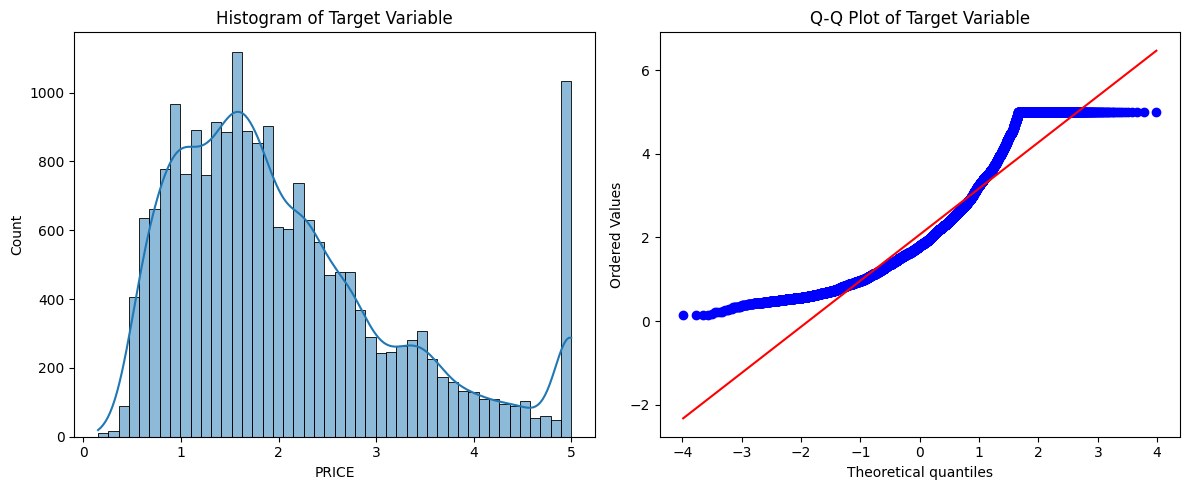

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: Statistics=0.9123, p-value=0.0000
Target variable does not appear to be normally distributed (reject H0)
Consider transforming the target variable (e.g., log transformation)

Step 4: Checking for outliers...


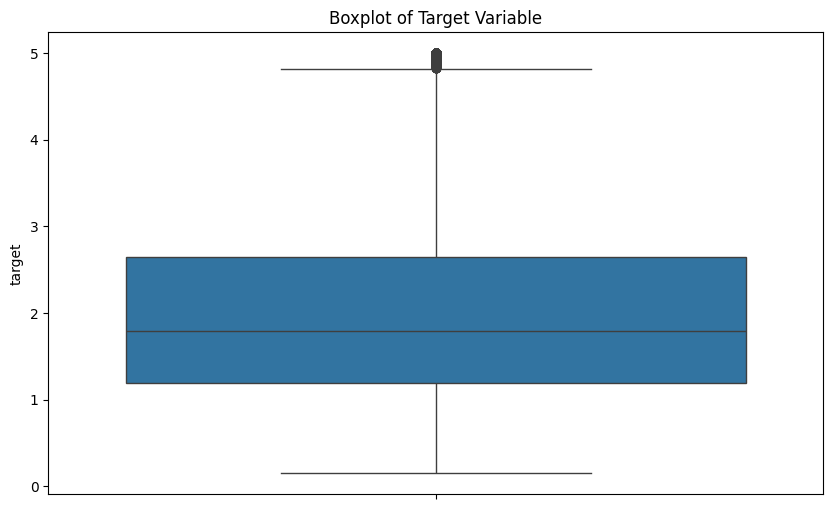

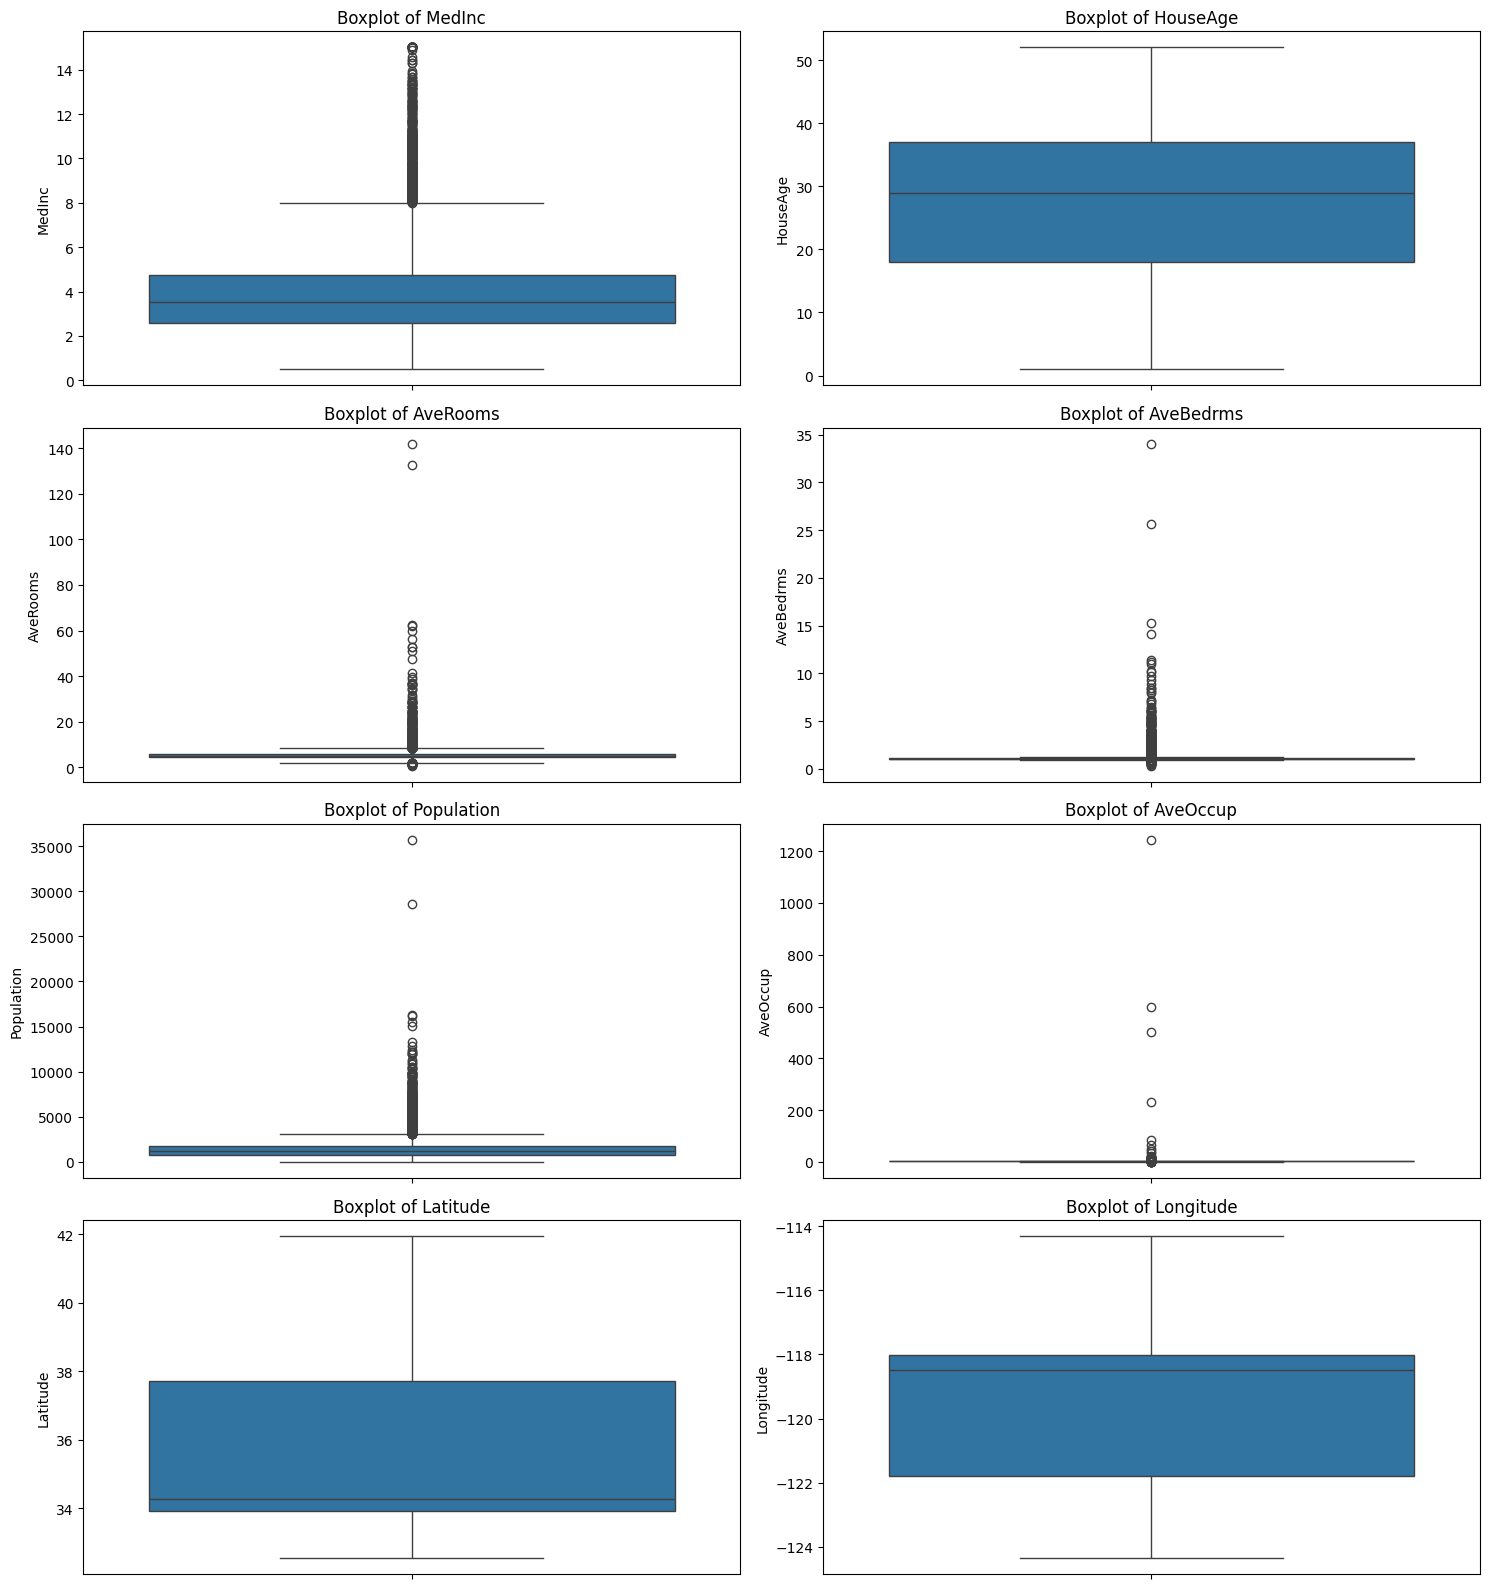


Step 5: Checking for multicollinearity...
Variance Inflation Factors:
      Feature         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243

VIF > 10 indicates problematic multicollinearity


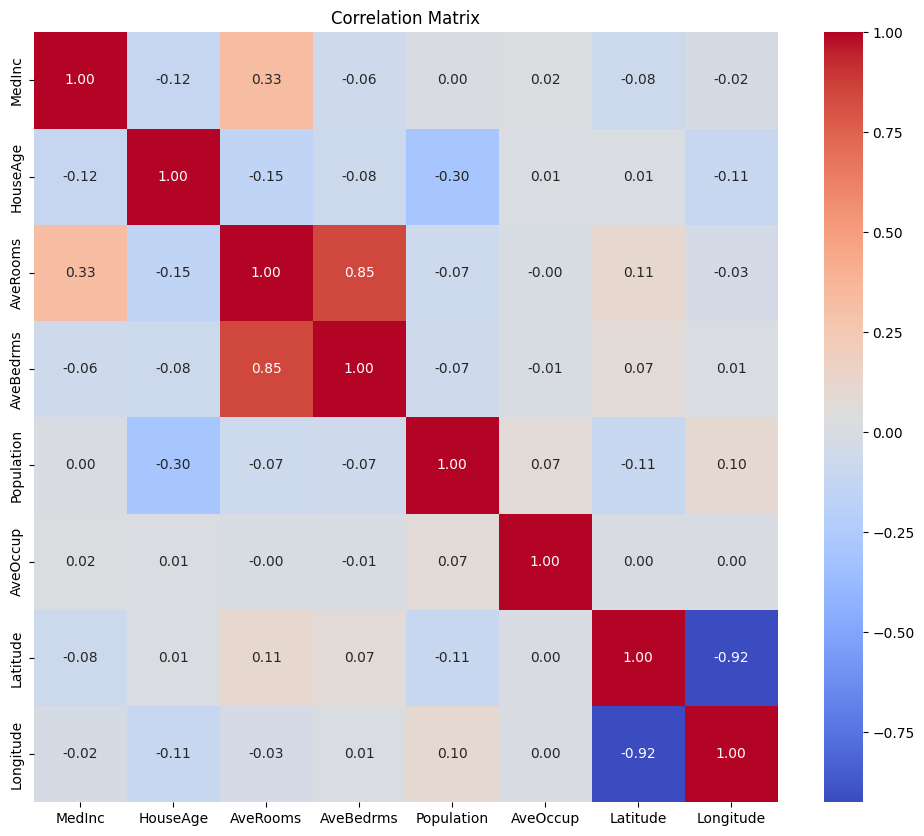


Step 6: Splitting data into train and test sets...
Training set size: 16512 samples
Testing set size: 4128 samples

Step 7: Scaling features...

Step 8: Checking feature significance...
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:58:26   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef  

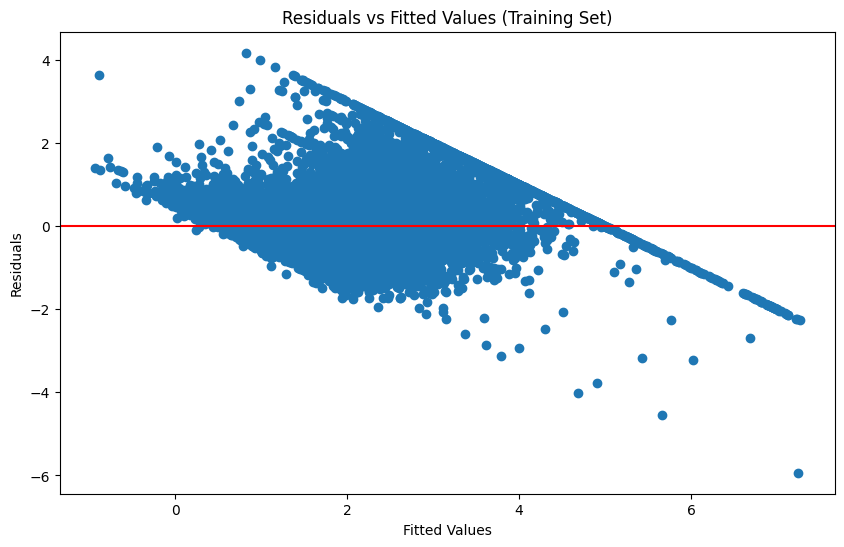

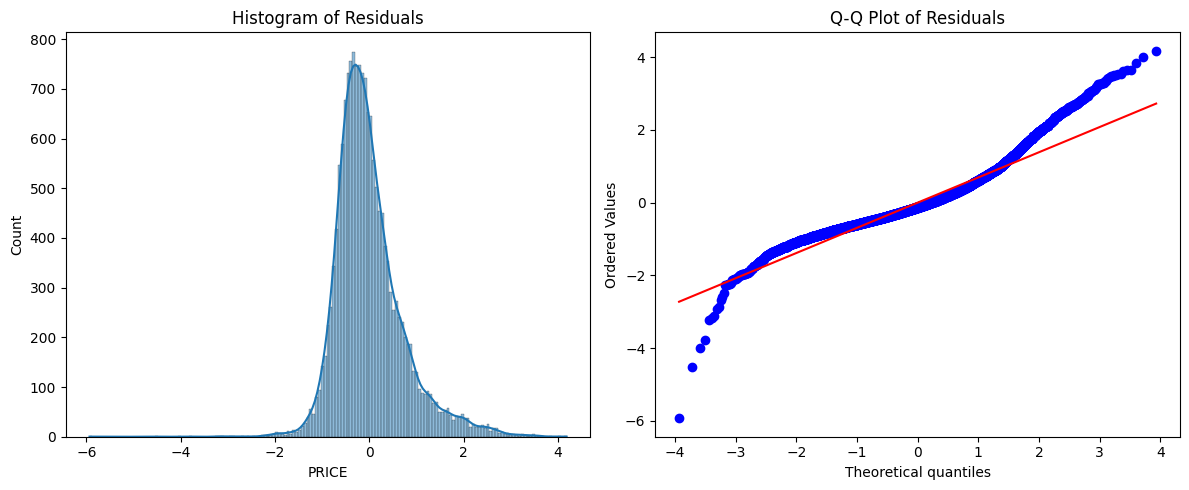

Shapiro-Wilk Test for Residuals: Statistics=0.9276, p-value=0.0000
Residuals do not appear to be normally distributed (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


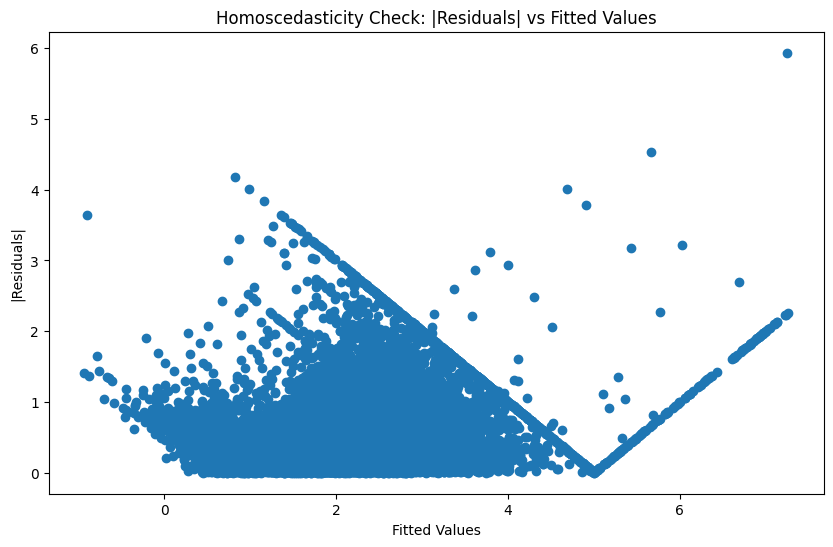

Levene Test for Homoscedasticity: Statistics=759.8680, p-value=0.0000
Residuals do not appear to have constant variance (reject H0)


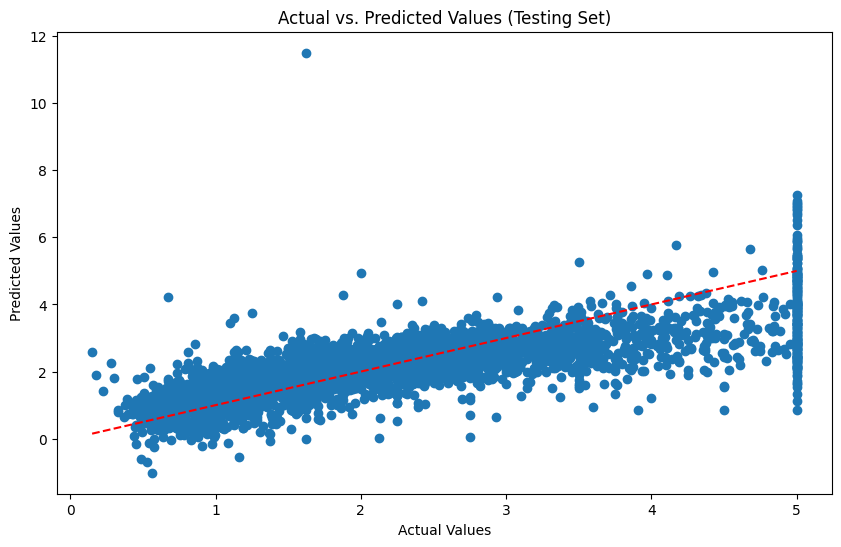

In [ ]:
if __name__ == "__main__":
    # Example with the California Housing dataset
    from sklearn.datasets import fetch_california_housing

    # Load California dataset
    housing = fetch_california_housing()
    housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
    housing_df['PRICE'] = housing.target  # Using 'PRICE' as target column name

    # Save to CSV for demonstration
    housing_df.to_csv('california_housing.csv', index=False)

    # Run the pipeline
    results = linear_regression_pipeline(
        data_path='california_housing.csv',  # Updated data path
        target_column='PRICE',  # Using 'PRICE' as target column name
        categorical_columns=None,
        test_size=0.2,
        random_state=42
    )

# Advantages

- Simplicity and Interpretability
- Computational Efficiency
- Good Performance with Linearly Separable Data
- Foundation for More Complex Models
- Wide Applicability

# Limitations

- Sensitivity to Outliers
- Assumption of Linearity
- Multicollinearity Issues
- Limited to Predicting a Single Continuous Outcome
- Assumption of Homoscedasticity

# ANOVA Test

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:

# Prepare the data for regression
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:

# Add a constant term for the intercept
X = sm.add_constant(X)

In [ ]:
X.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'MedHouseVal' is the target and the rest are features
formula = 'MedHouseVal ~ ' + ' + '.join(X_train.columns[1:])  # Excluding the constant

# Fit the model using the formula
model = ols(formula, data=pd.concat([X_train, y_train], axis=1)).fit()

# Now you can calculate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=1)
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                 df        sum_sq      mean_sq            F         PR(>F)
HouseAge        1.0    237.393880   237.393880   294.630459   1.802390e-65
AveRooms        1.0    695.297184   695.297184   862.936012  6.234918e-185
AveBedrms       1.0   2669.737141  2669.737141  3313.421044   0.000000e+00
Population      1.0     20.816332    20.816332    25.835230   3.759033e-07
AveOccup        1.0     16.782466    16.782466    20.828783   5.058469e-06
Latitude        1.0    679.629648   679.629648   843.490973  6.522339e-181
Longitude       1.0   4455.385517  4455.385517  5529.596117   0.000000e+00
Residual    16504.0  13297.839664     0.805734          NaN            NaN


- ANOVA in Regression: In multiple linear regression, the ANOVA table helps assess the overall significance of the model and the individual significance of each predictor.

- F-statistic and p-value: The F-statistic tests whether the variation explained by a predictor is significantly greater than the unexplained variation.

- The p-value(PR(>F)) indicates the probability of observing the F-statistic if the predictor had no effect.

- Type 1 ANOVA - sum_sq : Type 1 ANOVA calculates sums of squares sequentially, so the order of the features in the model matters.

- Interpretation: A small p-value (typically < 0.05) indicates that the predictor is statistically significant, meaning it has a significant effect on the target variable.

- The overall F statistic in the model summary tests the overall significance of the model.


All features are significant as pvalue< 0.05


## ANOVA for US Hosuing

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#Label Encoding
dataset['Address'] = dataset['Address'].astype('category')
dataset['Address'] = dataset['Address'].cat.codes

In [ ]:
model = ols('Price ~ Address', data=dataset).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

# Listing all Linear Assumption with seperate function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

def check_multiple_linear_regression_assumptions(df, formula=None, target_column=None, feature_columns=None,
                                                 test_size=0.3, random_state=42, plot_type='pdf'):
    """
    Perform comprehensive checks for multiple linear regression assumptions

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to analyze
    formula : str, optional
        R-style formula for the model (e.g., 'y ~ x1 + x2 + x3')
        If provided, takes precedence over target_column and feature_columns
    target_column : str, optional
        Name of the dependent variable column (required if formula not provided)
    feature_columns : list, optional
        List of independent variable column names (required if formula not provided)
    test_size : float, default 0.3
        Proportion of data to use for test set in cross-validation
    random_state : int, default 42
        Random seed for reproducibility
    plot_type : str, default 'pdf'
        Type of plots to generate ('pdf' or 'interactive')

    Returns:
    --------
    dict
        Results of assumption tests and model evaluation
    """
    print("=" * 80)
    print("MULTIPLE LINEAR REGRESSION DIAGNOSTICS")
    print("=" * 80)

    # Create a copy of the data for analysis
    data = df.copy()

    # Set up the model using either formula or specified columns
    if formula:
        print(f"Using formula: {formula}")
        y, X = dmatrices(formula, data=data, return_type='dataframe')
        feature_cols = X.columns
    else:
        if not target_column or not feature_columns:
            raise ValueError("Either 'formula' or both 'target_column' and 'feature_columns' must be provided")
        print(f"Using target: {target_column}, features: {feature_columns}")
        y = data[target_column]
        X = data[feature_columns]
        X = sm.add_constant(X)
        feature_cols = X.columns

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Get residuals
    residuals = model.resid
    fitted_values = model.fittedvalues

    # Store results
    results = {
        'model': model,
        'residuals': residuals,
        'fitted_values': fitted_values,
        'X': X,
        'y': y
    }

    # 0. Model Summary
    print("\n0. MODEL SUMMARY")
    print(model.summary())
    results['model_summary'] = model.summary()

    # 1. Check for linearity between predictors and target
    print("\n1. LINEARITY ASSUMPTION")
    print("   Checking if there's a linear relationship between predictors and target")

    # Residuals vs Fitted values plot
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_values, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted Values (Should show random scatter)')
    sm.graphics.abline_plot(0, 0, ax=plt.gca(), color='red')

    # Add LOWESS smoothed line to help identify non-linearity
    lowess = sm.nonparametric.lowess(residuals, fitted_values, frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], color='blue', linestyle='-', lw=2)
    plt.show()

    # Component + Residual plots (partial regression plots)
    feature_no_const = [f for f in feature_cols if f != 'const']
    fig = plt.figure(figsize=(15, 10))
    fig = sm.graphics.plot_ccpr_grid(model, fig=fig)
    plt.tight_layout()
    plt.show()

    # Added Variable Plots (to detect non-linearity after accounting for other predictors)
    fig = plt.figure(figsize=(15, 10))
    fig = sm.graphics.plot_regress_exog(model, feature_no_const, fig=fig)
    plt.tight_layout()
    plt.show()

    print("   ✓ Visual inspection required: Residuals should be randomly scattered around zero line")
    print("   ✓ Visual inspection required: Component+Residual plots should show linear patterns")

    # 2. Check for independence of errors (Durbin-Watson test)
    print("\n2. INDEPENDENCE OF ERRORS")
    durbin_watson = sm.stats.stattools.durbin_watson(residuals)
    results['durbin_watson'] = durbin_watson
    print(f"   Durbin-Watson statistic: {durbin_watson:.4f}")

    if durbin_watson < 1.5:
        print("   ⚠ Potential positive autocorrelation detected (DW < 1.5)")
    elif durbin_watson > 2.5:
        print("   ⚠ Potential negative autocorrelation detected (DW > 2.5)")
    else:
        print("   ✓ No significant autocorrelation detected (DW ~ 2)")

    # 3. Check for normality of residuals
    print("\n3. NORMALITY OF RESIDUALS")

    # QQ plot
    plt.figure(figsize=(10, 6))
    QQ = ProbPlot(residuals)
    fig = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plt.title('Q-Q Plot of Residuals (Should follow diagonal line)')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Histogram of Residuals (Should be normally distributed)')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.show()

    # Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(residuals)
    results['shapiro_test'] = shapiro_test
    print(f"   Shapiro-Wilk test: W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

    if shapiro_test[1] < 0.05:
        print("   ⚠ Residuals may not be normally distributed (p < 0.05)")
    else:
        print("   ✓ Residuals appear normally distributed (p >= 0.05)")

    # Jarque-Bera test for normality
    jb_test = stats.jarque_bera(residuals)
    results['jarque_bera_test'] = jb_test
    print(f"   Jarque-Bera test: JB={jb_test[0]:.4f}, p-value={jb_test[1]:.4f}")

    if jb_test[1] < 0.05:
        print("   ⚠ Residuals may not be normally distributed (p < 0.05)")
    else:
        print("   ✓ Residuals appear normally distributed (p >= 0.05)")

    # 4. Check for homoscedasticity (equal variance of residuals)
    print("\n4. HOMOSCEDASTICITY (EQUAL VARIANCE)")

    # Scale-Location plot (sqrt of standardized residuals vs fitted)
    standardized_residuals = residuals / np.sqrt(np.mean(residuals**2))
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
    lowess = sm.nonparametric.lowess(np.sqrt(np.abs(standardized_residuals)), fitted_values, frac=0.3)
    plt.plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='-', lw=2)
    plt.title('Scale-Location Plot: √|Standardized Residuals| vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('√|Standardized Residuals|')
    plt.show()

    # Breusch-Pagan test
    bp_test = het_breuschpagan(residuals, X)
    results['breusch_pagan_test'] = bp_test
    print(f"   Breusch-Pagan test: LM={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    if bp_test[1] < 0.05:
        print("   ⚠ Heteroscedasticity detected (p < 0.05)")
    else:
        print("   ✓ Homoscedasticity assumption likely met (p >= 0.05)")

    # White's test
    white_test = het_white(residuals, X)
    results['white_test'] = white_test
    print(f"   White's test: LM={white_test[0]:.4f}, p-value={white_test[1]:.4f}")

    if white_test[1] < 0.05:
        print("   ⚠ Heteroscedasticity detected (p < 0.05)")
    else:
        print("   ✓ Homoscedasticity assumption likely met (p >= 0.05)")

    # 5. Check for multicollinearity
    print("\n5. MULTICOLLINEARITY")

    # Correlation matrix
    if len(feature_no_const) > 1:
        X_no_const = X.drop('const', axis=1)
        plt.figure(figsize=(10, 8))
        correlation_matrix = X_no_const.corr()
        mask = np.triu(correlation_matrix)
        sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Features')
        plt.show()

        # VIF (Variance Inflation Factor)
        vif_data = pd.DataFrame()
        vif_data["Variable"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        results['vif'] = vif_data
        print("   Variance Inflation Factors (VIF):")
        print(vif_data)

        high_vif = vif_data[vif_data["VIF"] > 5].shape[0]
        if high_vif > 1:  # Ignore the constant term which often has high VIF
            print(f"   ⚠ Potential multicollinearity detected ({high_vif-1} variables with VIF > 5)")
        else:
            print("   ✓ No significant multicollinearity detected (VIF <= 5 for all variables)")
    else:
        print("   ✓ Multicollinearity check not applicable (only one feature)")

    # 6. Check for influential observations / outliers
    print("\n6. INFLUENTIAL OBSERVATIONS / OUTLIERS")

    # Calculate influence statistics
    influence = model.get_influence()

    # Cook's distance
    cooks_d = influence.cooks_distance[0]
    results['cooks_distance'] = cooks_d

    # Plot Cook's distance
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
    plt.axhline(y=4/len(X), color='r', linestyle='--')
    plt.title("Cook's Distance (Potential influential points above red line)")
    plt.xlabel('Observation')
    plt.ylabel("Cook's Distance")
    plt.show()

    # Identify potential influential observations
    threshold = 4/len(X)
    influential_points = np.where(cooks_d > threshold)[0]
    results['influential_points'] = influential_points

    if len(influential_points) > 0:
        print(f"   ⚠ {len(influential_points)} potentially influential observations detected")
        print(f"   Influential observation indices: {influential_points}")
    else:
        print("   ✓ No influential observations detected")

    # Leverage plot
    plt.figure(figsize=(10, 6))
    sm.graphics.influence_plot(model, criterion="cooks", size=50)
    plt.tight_layout()
    plt.show()

    # DFFITS (difference in fits)
    dffits = influence.dffits[0]
    dffits_threshold = 2 * np.sqrt(X.shape[1] / X.shape[0])
    high_dffits = np.where(np.abs(dffits) > dffits_threshold)[0]
    results['high_dffits'] = high_dffits

    if len(high_dffits) > 0:
        print(f"   ⚠ {len(high_dffits)} observations with high DFFITS detected")
    else:
        print("   ✓ No observations with high DFFITS detected")

    # DFBETAS (difference in beta coefficients)
    dfbetas = influence.dfbetas
    dfbetas_threshold = 2 / np.sqrt(X.shape[0])
    high_dfbetas = {}

    for i, coef in enumerate(X.columns):
        idx = np.where(np.abs(dfbetas[:, i]) > dfbetas_threshold)[0]
        if len(idx) > 0:
            high_dfbetas[coef] = idx

    results['high_dfbetas'] = high_dfbetas

    if high_dfbetas:
        print(f"   ⚠ Observations with high DFBETAS detected for {len(high_dfbetas)} coefficients")
    else:
        print("   ✓ No observations with high DFBETAS detected")

    # 7. Feature importance and coefficient analysis
    print("\n7. FEATURE IMPORTANCE AND COEFFICIENT ANALYSIS")

    # Standardized coefficients for comparison
    if formula is None:  # Don't calculate if using formula (due to potential transformations)
        X_no_const = X.drop('const', axis=1)
        X_z = (X_no_const - X_no_const.mean()) / X_no_const.std()
        X_z = sm.add_constant(X_z)
        model_z = sm.OLS(y, X_z).fit()

        # Create a coefficient comparison table
        coef_df = pd.DataFrame({
            'Variable': X.columns,
            'Coefficient': model.params,
            'Std_Error': model.bse,
            'p_value': model.pvalues,
            'Standardized_Coef': np.append(np.nan, model_z.params[1:])  # Add nan for const
        })
        print("   Coefficient Analysis:")
        print(coef_df)
        results['coefficient_analysis'] = coef_df

        # Plot feature importance using standardized coefficients
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=model_z.params[1:], y=X_no_const.columns)
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        plt.title('Standardized Coefficients (Feature Importance)')
        plt.xlabel('Standardized Coefficient Value')
        plt.tight_layout()
        plt.show()

    # 8. Cross-validation
    print("\n8. MODEL PERFORMANCE ASSESSMENT")

    # R-squared and Adjusted R-squared
    print(f"   R-squared: {model.rsquared:.4f}")
    print(f"   Adjusted R-squared: {model.rsquared_adj:.4f}")

    # F-statistic and p-value
    print(f"   F-statistic: {model.fvalue:.4f}")
    print(f"   Prob (F-statistic): {model.f_pvalue:.4f}")

    # AIC and BIC
    print(f"   AIC: {model.aic:.4f}")
    print(f"   BIC: {model.bic:.4f}")

    # 9. Overall assessment
    print("\n9. OVERALL ASSESSMENT")

    assumptions_met = True
    warnings = []

    if durbin_watson < 1.5 or durbin_watson > 2.5:
        assumptions_met = False
        warnings.append("Independence of errors assumption may be violated")

    if shapiro_test[1] < 0.05 or jb_test[1] < 0.05:
        assumptions_met = False
        warnings.append("Normality of residuals assumption may be violated")

    if bp_test[1] < 0.05 or white_test[1] < 0.05:
        assumptions_met = False
        warnings.append("Homoscedasticity assumption may be violated")

    if len(feature_no_const) > 1 and high_vif > 1:
        assumptions_met = False
        warnings.append("Multicollinearity detected among predictors")

    if len(influential_points) > 0:
        assumptions_met = False
        warnings.append("Influential observations detected")

    if assumptions_met:
        print("   ✓ All major assumptions for multiple linear regression appear to be met.")
        print("   ✓ Multiple linear regression is an appropriate method for this dataset.")
    else:
        print("   ⚠ Some assumptions for multiple linear regression are not met:")
        for warning in warnings:
            print(f"     - {warning}")
        print("\n   SUGGESTED REMEDIES:")

        if "Independence of errors" in '\n'.join(warnings):
            print("     - For time series data: consider time series models like ARIMA or include lagged variables")
            print("     - For spatial data: consider spatial models or adding location-based features")
            print("     - Check for missing important variables that might explain the autocorrelation")

        if "Normality of residuals" in '\n'.join(warnings):
            print("     - Try transforming the target variable (log, sqrt, Box-Cox)")
            print("     - Consider robust regression methods")
            print("     - For large sample sizes, the CLT may still allow valid inference despite non-normality")

        if "Homoscedasticity" in '\n'.join(warnings):
            print("     - Use heteroscedasticity-consistent standard errors (HC0-HC3)")
            print("     - Try weighted least squares regression")
            print("     - Transform the target and/or predictors (log transformation often helps)")
            print("     - Consider adding interaction terms or polynomial features")

        if "Multicollinearity" in '\n'.join(warnings):
            print("     - Remove highly correlated predictors")
            print("     - Use regularization methods (Ridge, Lasso, Elastic Net)")
            print("     - Apply dimensionality reduction (PCA)")
            print("     - Create composite variables from correlated predictors")

        if "Influential observations" in '\n'.join(warnings):
            print("     - Investigate outliers and potential data entry errors")
            print("     - Consider robust regression methods")
            print("     - Re-run the analysis without the influential observations to assess their impact")

    return results

# Example usage with a sample dataset
if __name__ == "__main__":
    # Create a sample dataset
    np.random.seed(42)
    n = 200

    # Independent variables
    X1 = np.random.normal(0, 1, n)
    X2 = np.random.normal(0, 1, n)
    X3 = 0.7 * X1 + 0.3 * np.random.normal(0, 1, n)  # Create some multicollinearity
    X4 = np.random.normal(0, 1, n)

    # Target variable with some non-linearity and heteroscedasticity
    error = np.random.normal(0, 1 + 0.5 * np.abs(X1), n)  # Heteroscedastic errors
    y = 2 * X1 + 3 * X2 + 1.5 * X3 - 2 * X4 + 0.5 * X1**2 + error  # Non-linear component X1^2

    # Create DataFrame
    data = pd.DataFrame({
        'X1': X1,
        'X2': X2,
        'X3': X3,
        'X4': X4,
        'y': y
    })

    # Add some outliers
    data.loc[0, 'y'] = 30  # Add an outlier

    # Run the assumption check using column specification
    # check_multiple_linear_regression_assumptions(data, target_column='y', feature_columns=['X1', 'X2', 'X3', 'X4'])

    # Run the assumption check using formula specification
    check_multiple_linear_regression_assumptions(data, formula='y ~ X1 + X2 + X3 + X4')

## Key Enhancements for Multiple Linear Regression

This function builds on the previous version with several important additions:

### 1. Flexible Model Specification
- Supports both column-based specification and R-style formula notation
- Formula notation allows for easy inclusion of interactions, polynomial terms, and transformations

### 2. Improved Linearity Diagnostics
- **Component + Residual plots** (partial regression plots) to identify non-linear relationships for each predictor while controlling for other variables
- **Added Variable Plots** to detect the specific effect of each predictor after accounting for others
- LOWESS smoothed lines on residual plots to better identify non-linear patterns

### 3. Enhanced Normality Tests
- Both **Shapiro-Wilk** and **Jarque-Bera** tests for more robust assessment of residual normality
- Clear visualization of normality through both Q-Q plots and histograms

### 4. More Comprehensive Heteroscedasticity Tests
- **Breusch-Pagan test** for detecting general heteroscedasticity
- **White's test** for detecting both heteroscedasticity and specification errors
- Scale-Location plot with LOWESS smoothing to visualize changing variance

### 5. Detailed Multicollinearity Analysis
- Correlation matrix with heatmap visualization
- **Variance Inflation Factor (VIF)** calculation for each predictor
- Clear thresholds and warnings for high multicollinearity

### 6. Advanced Influence Diagnostics
- **Cook's distance** to identify influential observations
- **DFFITS** to measure how each observation affects the fitted values
- **DFBETAS** to measure how each observation affects each coefficient estimate
- Influence plots to visually identify high-leverage, high-influence points

### 7. Feature Importance Analysis
- **Standardized coefficients** to compare the relative importance of predictors
- Visualization of feature importance
- Comprehensive coefficient table with standard errors and p-values

### 8. Model Performance Assessment
- R-squared and adjusted R-squared
- F-statistic and its p-value
- AIC and BIC for model comparison purposes

### 9. Detailed Remedies
- Specific suggestions for addressing each type of assumption violation
- Multiple options for handling each issue based on the specific problem

## How to Use This Function

You can use this function in two ways:

1. **Column-based specification**:
```python
check_multiple_linear_regression_assumptions(
    df=your_dataframe,
    target_column='target_variable',
    feature_columns=['feature1', 'feature2', 'feature3']
)
```

2. **Formula-based specification** (more flexible):
```python
check_multiple_linear_regression_assumptions(
    df=your_dataframe,
    formula='target ~ feature1 + feature2 + I(feature3^2) + feature1:feature2'
)
```

The formula approach is particularly useful for testing more complex relationships, as it allows you to easily include:
- Polynomial terms: `I(X^2)`
- Interaction terms: `X1:X2`
- Log transformations: `np.log(X)`
- Other transformations without modifying your original data

**Disadvantages of Regression Analysis**
- Assumption Dependencies: Several presumptions, including linearity, independence, homoscedasticity, and error normalcy, underpin regression models. Breaking these presumptions may lead to erroneous or deceptive results.
- Multicollinearity: Many independent variables may affect outcomes, making it difficult to determine the influence of specific predictors.
- Overfitting: When trained on training data, a model overfits the training data and performs much worse predicting new data. This happens when the model collects noise in addition to the signal.
- Sensitivity to Outliers: Outliers can significantly alter the model’s coefficients and outcomes in regression analysis.
- Limited by Linear Relationships: The assumption of a linear connection between variables in simple linear regression may not hold in all cases. Researchers need advanced methods like polynomial regression or machine learning models for more complicated interactions.
- Interpretability Issues:  It can be challenging to determine how each predictor affects the results of a model with many predictors, particularly in multiple regression. This difficulty increases if there are interactions between the variables.
- Sample Size Requirements: Regression analysis requires a substantial sample size to yield accurate estimations. Tiny sample sizes may result in unstable estimates and inadequate generalization.


# Reference:



- https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

- https://www.analyticsvidhya.com/blog/2024/06/regression-analysis/

- https://spotintelligence.com/2024/10/10/linear-regression-in-machine-learning-made-simple-how-to-python-tutorial/